In [1]:
from aicsimageio import AICSImage
import napari
from aicsimageio.readers import CziReader
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the image
reader = CziReader("extern_Synlab_2156_17_3_MTB.czi")
# Get whole image
smear = reader.get_image_data("MYX", C=0)


array([[[ 239,  309,  271, ...,  225,  225,  306],
        [ 186,  202,  221, ...,  257,  257,  222],
        [ 258,  246,  187, ...,  319,  319,  186],
        ...,
        [ 226,  247,  198, ...,  207,  159,  228],
        [ 232,  221,  244, ...,  226,  196,  189],
        [ 129,  213,  184, ...,  215,  172,  248]],

       [[ 198,  218,  188, ...,  237,  178,  210],
        [ 217,  287,  213, ...,  289,  227,  234],
        [ 238,  221,  190, ...,  240,  244,  279],
        ...,
        [ 196,  173,  239, ..., 1388, 1147, 1303],
        [ 156,  206,  200, ..., 1567, 1272, 1209],
        [ 237,  151,  214, ..., 1353, 1372, 1418]],

       [[ 178,  230,  201, ...,  271,  229,  311],
        [ 183,  298,  239, ...,  286,  213,  260],
        [ 230,  194,  207, ...,  247,  247,  179],
        ...,
        [1084, 1238, 1212, ...,  210,  172,  225],
        [1118, 1114, 1014, ...,  257,  165,  175],
        [1204, 1113, 1249, ...,  257,  240,  221]],

       ...,

       [[ 290,  243,  24

In [3]:
# save in a new variable the information regarding the 673th tile out of 1345
img = smear[673]
img.shape
print(img)
print(np.max(img))
print(np.min(img))


[[304 288 262 ... 202 341 261]
 [262 246 220 ... 248 205 267]
 [291 217 192 ... 250 267 194]
 ...
 [813 823 778 ... 228 263 206]
 [797 918 857 ... 260 294 200]
 [962 775 905 ... 193 210 289]]
10519
98


In [4]:
# rescale the image to 0-255
def rescale(image: np.ndarray):
    """
    :param image: to  be rescaled
    :return: rescaled image
    """
    return (image - np.min(image)) / (np.max(image) - np.min(image)) * 255

# visualize the image with napari using its numpy array
def visualize_napari(numpy_img: np.ndarray):
    """
    :param numpy_img: image to be visualized
    """
    with napari.gui_qt():
        viewer = napari.Viewer()
        viewer.add_image(numpy_img)

# visualize different images in the same moment
def visualize_all_list_napari(numpy_img_list: np.ndarray):
    """
    :param numpy_img_list: list containing different images to be visualized
    """
    with napari.gui_qt():
        viewer = napari.Viewer()
        for img in numpy_img_list:
            viewer.add_image(img)
            
# plot histogram of pixel intensity 
def plot_histogram(image: np.ndarray):
    plt.hist(image.ravel(),image.max(),[0,image.max()])
    plt.show()


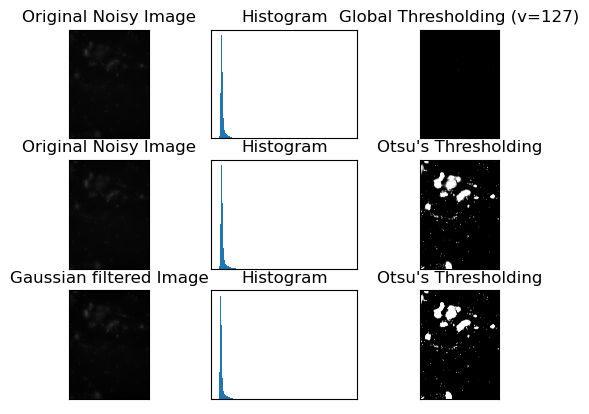

In [74]:
# different thresholding methods example from opencv documentation.

# global thresholding
ret1,th1 = cv.threshold(img,5000,255,cv.THRESH_BINARY)
# manually setting the global threshold value therefore not automatic / the optimal value / the optimal choice
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
# blur is not really helping us here because we are looking for the opposite task. 
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

#visualize_napari(th1)
img = img.astype('uint8') #sbagliato
#other thresholding methods
img_blur = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img_blur,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img_blur,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img_blur,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img_blur, th1, th2, th3]

In [24]:
# compute Otsu's thresholding
def otsu_thresholding(image : np.ndarray):
    """
    Threshold and binarize an image using Otsu's method

    :param image: image you want to threshold
    :return: ret: threshold value
              th: binary image
    """
    ret,th = cv.threshold(image,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    #ret is the computed value of the threshold AND th is the image with the threshold applied
    return ret, th

#compute hard thresholding
def hard_thresholding(image : np.ndarray, threshold : int):
    """
    Implement an hard threshold. Take everything above "threshold" to be white
    and everything below "threshold" to be black

    :param image: image to be thresholded
    :param threshold: hard threshold to be implemented
    :return: ret: threshold value
              th: binary image
    """
    ret,th = cv.threshold(image,threshold,255,cv.THRESH_BINARY)
    return ret, th

# approach for going through the different tiles and applying the thresholding separately
# split the whole images into tiles
def split_into_tiles(image : np.ndarray, tile_size: int):
    """
    split image into tiles of shape tile_size*tile_size

    :param image: image to be split
    :param tile_size: dimensions of single tiles
    :return: tiles: list with the different tiles
    """
    tiles = []
    for i in range(0, image.shape[0], tile_size):
        for j in range(0, image.shape[1], tile_size):
            tile = image[i:i+tile_size, j:j+tile_size]
            tiles.append(tile)
    return tiles

# approach in which we sharp (in stead of blur as the example) the image before applying the thresholding
# sharpen the image using a high-pass filter TODO: can we do this better? sharp out better maybe in sub-images?
def sharpen(image: np.ndarray):
    """
    :param image: image to be sharpened
    :return: sharp image
    """
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    return cv.filter2D(image, -1, kernel)

# change np array to uint8 ATENTION: in uint8 only numbers until 2^7 can be stored
def to_uint8(image: np.ndarray):
    return np.uint8(image)


def find_coordinates(image: np.ndarray):
    """
    Find the coordinates of the connected compenents of the image.
    to be more specific, find first coordinate of a component

    :param image: image where we want to find the connected components
    :return: coordinates: array with coordinates of the components in the rows
    """
    num_conn_comp, labels_conn_comp = cv.connectedComponents(image)
    #num_conn_comp tells us how many components we have
    #labels_conn_comp is an image where the entries where there should be
    # a component are the label of that component
    # overwritten in such a way that the the values of the pixels are the value of the corresponding connected component.
    labels_conn_comp = labels_conn_comp.astype(np.uint64)    #cannot use uint8 cannot rappresent all numbers with uint8

    #save coordinates in two dimensional array
    coordinates = np.zeros((num_conn_comp,2),dtype="int64")

    # iterate over the connected components and add the coordinates of the pixels to the list of coordinates
    for i in range(1, num_conn_comp):
        coordinates[i,0] = np.where(labels_conn_comp == i)[0][0]
        coordinates[i,1] = np.where(labels_conn_comp == i)[1][0]

    return coordinates

#connectedComponentsWithStats works better, can get centroid, in this way can put the box/rectangle around the bacilli
#TODO: should already work, we just need to be sure what centroids gives us
def get_connected_components_coordinate(img):
    connectivity = 8
    #find connected components
    num_labels, labels_im, stats, centroids = cv.connectedComponentsWithStats(img, connectivity)
    #get coordinates of connected components
    coordinates = np.zeros((num_labels, 2),dtype=np.uint64)  #NO uint8

    for i in range(1, num_labels):
        coordinates[i,0] = centroids[i,0]
        coordinates[i,1] = centroids[i,1]
    print(coordinates)
    return coordinates

# add the 2d bounding boxes to the image
def add_bounding_boxes(image, coordinates):
    """
    Add whhite rectangles around bacilli

    :param image: image with bacilli to be boxed
    :param coordinates:  coordinates of the center of the bacillus
    """
    for i in range(len(coordinates)):
            x_min = coordinates[i][0]
            x_max = coordinates[i][0]
            y_min = coordinates[i][1]
            y_max = coordinates[i][1]
            cv.rectangle(image, (y_min+15, x_min+15), (y_max-15, x_max-15), (255, 0, 0), 4)

In [23]:

sharpened_img = sharpen(img)
#threshold, otsu_sharpened = otsu_thresholding(sharpened_img)
threshold, hard_threshold = hard_thresholding(sharpened_img, 10000)

coordinates= find_coordinates(hard_threshold)
add_bounding_boxes(hard_threshold,coordinates)
#img_with_bounding_boxes = add_bounding_boxes(img, bounding_boxes)
visualize_napari(hard_threshold)

C:\Users\matteo\anaconda3\envs\tub\lib\site-packages\napari\_qt\qt_event_loop.py:284: FutureWarning: 
The 'gui_qt()' context manager is deprecated.
If you are running napari from a script, please use 'napari.run()' as follows:

    import napari

    viewer = napari.Viewer()  # no prior setup needed
    # other code using the viewer...
    napari.run()

In IPython or Jupyter, 'napari.run()' is not necessary. napari will automatically
start an interactive event loop for you: 

    import napari
    viewer = napari.Viewer()  # that's it!

  warn(
14-Dec-22 22:39:42 - vispy    - WARNING  - QWindowsWindow::setGeometry: Unable to set geometry 1280x1104+0+34 (frame: 1302x1160-11-11) on QWidgetWindow/"_QtMainWindowClassWindow" on "\\.\DISPLAY1". Resulting geometry: 1280x1102+0+34 (frame: 1302x1158-11-11) margins: 11, 45, 11, 11 minimum size: 374x551 MINMAXINFO maxSize=0,0 maxpos=0,0 mintrack=770,1158 maxtrack=0,0)


In [6]:

sharpened_img = sharpen(img)
#threshold, otsu_sharpened = otsu_thresholding(sharpened_img)
threshold, hard_threshold = hard_thresholding(sharpened_img, 10000)
#general_threshold = to_uint8(general_threshold)
#bounding_box_img = bounding_box(general_threshold)

images = [img, sharpened_img, hard_threshold]

print(threshold)
visualize_all_list_napari(images)
print(np.max(sharpened_img))
print(np.mean(sharpened_img))




10000.0


C:\Users\matteo\anaconda3\envs\tub\lib\site-packages\napari\_qt\qt_event_loop.py:284: FutureWarning: 
The 'gui_qt()' context manager is deprecated.
If you are running napari from a script, please use 'napari.run()' as follows:

    import napari

    viewer = napari.Viewer()  # no prior setup needed
    # other code using the viewer...
    napari.run()

In IPython or Jupyter, 'napari.run()' is not necessary. napari will automatically
start an interactive event loop for you: 

    import napari
    viewer = napari.Viewer()  # that's it!

  warn(
14-Dec-22 19:13:03 - vispy    - WARNING  - QWindowsWindow::setGeometry: Unable to set geometry 2172x1352+0+20 (frame: 2194x1408-11-25) on QWidgetWindow/"_QtMainWindowClassWindow" on "\\.\DISPLAY1". Resulting geometry: 2166x1170+3+34 (frame: 2188x1226-8-11) margins: 11, 45, 11, 11 minimum size: 374x552 MINMAXINFO maxSize=0,0 maxpos=0,0 mintrack=770,1160 maxtrack=0,0)


34661
474.7271916815575


768.0